In [1]:
import pandas as pd

In [2]:
bp = pd.read_csv('/content/backprop.csv')#Import data set

In [3]:
bp.head()#check the 1st five data

,S.No,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2/4/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2/4/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2/4/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2/4/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2/4/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
bp.shape#sahpe of the data

(8143, 8)

In [6]:
bp.isnull().sum()#check null value to be remove

S.No             0
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [7]:
# Remove unwanted columns
bp1 = bp.drop(['S.No','date'],axis=1)
bp1.head(2)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1
1,23.15,27.2675,429.5,714.00,0.004783,1


In [8]:
bp1.dtypes#data types

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [9]:
bp1['Occupancy'].unique()#Check unique value of Target variable

array([1, 0])

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
X = bp1.drop(['Occupancy'],axis=1).values#.reshape(-1,1)#Independend variable gnerating
y = bp1['Occupancy'].values.reshape(-1,1) #y.values.reshape(-1, 1)#Dependent variable generating

In [12]:
#split the dataset into testing data (30%) and training data (70%).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
X_train.shape, X_test.shape

((5700, 5), (2443, 5))

### Build a model (ANN) in tensorflow/keras

In [14]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(X_train.shape[1],), activation='relu'),#Commonly relu is good for intputm in binary classifications propblem
    keras.layers.Dense(15, activation='relu'),#Commonly relu is good for hidden layer
    keras.layers.Dense(1, activation='sigmoid')#Commonly sigmoid is good for output
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])  

In [18]:
history = model.fit(X_train, y_train, epochs=100,batch_size=10,validation_data=(X_test, y_test))
history

Epoch 1/100
570/570 [==============================] - 3s 5ms/step - loss: 0.0457 - accuracy: 0.9884 - val_loss: 0.0398 - val_accuracy: 0.9889
Epoch 2/100
570/570 [==============================] - 3s 5ms/step - loss: 0.0443 - accuracy: 0.9886 - val_loss: 0.0394 - val_accuracy: 0.9889
Epoch 3/100
570/570 [==============================] - 3s 6ms/step - loss: 0.0449 - accuracy: 0.9881 - val_loss: 0.0404 - val_accuracy: 0.9889
Epoch 4/100
570/570 [==============================] - 3s 5ms/step - loss: 0.0425 - accuracy: 0.9888 - val_loss: 0.0421 - val_accuracy: 0.9885
Epoch 5/100
570/570 [==============================] - 3s 5ms/step - loss: 0.0435 - accuracy: 0.9888 - val_loss: 0.0402 - val_accuracy: 0.9889
Epoch 6/100
570/570 [==============================] - 3s 5ms/step - loss: 0.0441 - accuracy: 0.9882 - val_loss: 0.0525 - val_accuracy: 0.9804
Epoch 7/100
570/570 [==============================] - 4s 6ms/step - loss: 0.0458 - accuracy: 0.9875 - val_loss: 0.0399 - val_accuracy: 0.9889

In [19]:
#What is the highest testing accuracy you were able to achieve from the model?
loss, accuracy=model.evaluate(X_test, y_test)
print("loss", loss)
print("accuracy", accuracy)#Accuracy means correct predictions

77/77 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9885
loss 0.03721233457326889
accuracy 0.9885386824607849


In [20]:
#Let's check our prediction
yp=model.predict(X_test)
yp[:5]

array([[9.0420789e-01],
       [9.1203117e-01],
       [1.8844018e-10],
       [1.1471204e-11],
       [2.6219001e-12]], dtype=float32)

In [21]:
#Convert to normal Occupancy 
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [22]:
y_pred[:10]

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0]

In [23]:
y_test[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1937
           1       0.95      1.00      0.97       506

    accuracy                           0.99      2443
   macro avg       0.97      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



accuracy - 99%

Text(69.0, 0.5, 'Truth')

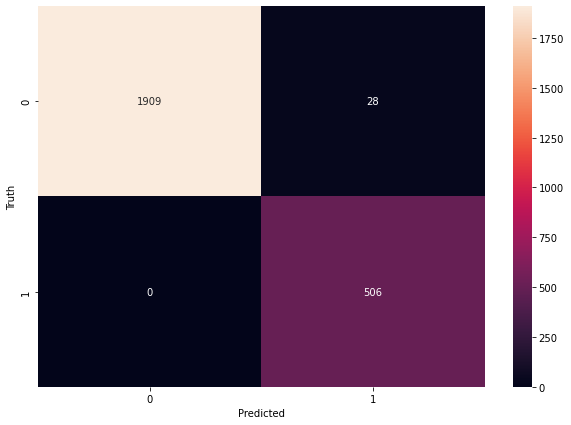

In [25]:
import seaborn as sn
from matplotlib import pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [27]:
#accuracy = history_dict['accuracy']
#val_accuracy = history_dict['val_acccuracy']

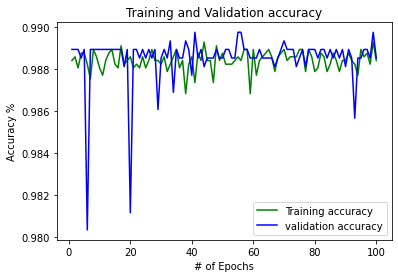

In [29]:
#Plot the training accuracy and the testing accuracy with the no of epochs in one plot
trainloss = history.history['accuracy']
valid_loss = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, trainloss, 'g', label='Training accuracy')
plt.plot(epochs, valid_loss, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()